In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from feature_engine.encoding import CountFrequencyEncoder

In [51]:
ds = pd.read_csv("train.csv",usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

In [52]:
ds.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [53]:
# Lets have a look at number of unique categories for each feature
for column in ds.columns:
  print(f"column {column} has {len(ds[column].unique())} unique categories")

column Neighborhood has 25 unique categories
column Exterior1st has 15 unique categories
column Exterior2nd has 16 unique categories
column SalePrice has 663 unique categories


In [54]:
# let's have a look at unique labels
ds['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [55]:
ds['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [56]:
ds['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

### Note
We select which digit to assign each category using the train set, and then use those mappings in the test set.

Note that to do this technique with pandas, we need to keep the target within the training set

In [57]:
# Splitting the test and train set
X_train, X_test, y_train, y_test = train_test_split(
    ds[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']],  # this time we keep the target!!
    ds['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

# see the shape of train and test set
X_train.shape, X_test.shape

((1022, 4), (438, 4))

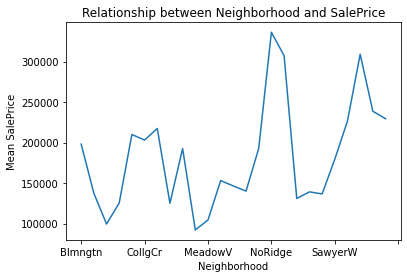

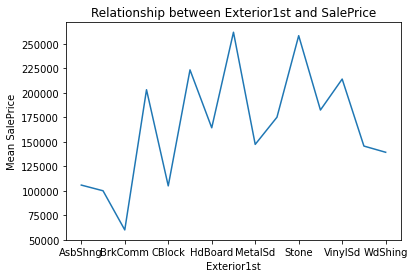

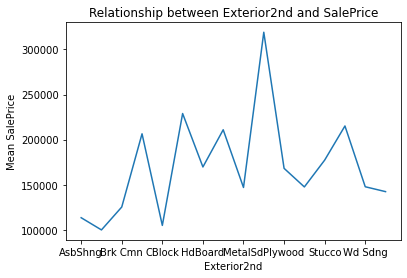

In [58]:
# let's plot the relationship of the categories with the target

for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    fig = plt.figure()
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Relationship between {} and SalePrice'.format(var))
    fig.set_ylabel('Mean SalePrice')
    plt.show()

We can see that the relationship between the target and the categories of the categorical variables goes up and down, depending on the category.



In [59]:
# let's order the labels in ascending order according to the mean target value

X_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values()

Neighborhood
IDOTRR      92174.166667
BrDale      99440.000000
MeadowV    104441.666667
Edwards    125082.676056
BrkSide    125438.414634
OldTown    130958.328767
Sawyer     136596.442623
Blueste    137500.000000
SWISU      139154.666667
NPkVill    140107.142857
NAmes      146435.264901
Mitchel    153070.444444
SawyerW    179463.088889
Gilbert    192662.290909
NWAmes     192788.235294
Blmngtn    198164.500000
CollgCr    203086.371429
ClearCr    210034.666667
Crawfor    217453.914286
Somerst    226644.196429
Veenker    229500.000000
Timber     238700.100000
NridgHt    307418.137255
StoneBr    309105.937500
NoRidge    336264.666667
Name: SalePrice, dtype: float64

Now, we will replace those categories, ordered as they are, by the numbers 0 to k, where k is the number of different categories minus 1, in this case 25 - 1 = 24.

So IDOTRR will be replaced by 0 and NoRidge by 24, just to be clear.

In [60]:
# Lets generate ordered list of labels
ordered_labels = X_train.groupby(['Neighborhood'
                                  ])['SalePrice'].mean().sort_values().index

ordered_labels

Index(['IDOTRR', 'BrDale', 'MeadowV', 'Edwards', 'BrkSide', 'OldTown',
       'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor',
       'Somerst', 'Veenker', 'Timber', 'NridgHt', 'StoneBr', 'NoRidge'],
      dtype='object', name='Neighborhood')

In [61]:
# let's create a dictionary with the mappings of categories to numbers
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

# check the mapping
ordinal_mapping

{'IDOTRR': 0,
 'BrDale': 1,
 'MeadowV': 2,
 'Edwards': 3,
 'BrkSide': 4,
 'OldTown': 5,
 'Sawyer': 6,
 'Blueste': 7,
 'SWISU': 8,
 'NPkVill': 9,
 'NAmes': 10,
 'Mitchel': 11,
 'SawyerW': 12,
 'Gilbert': 13,
 'NWAmes': 14,
 'Blmngtn': 15,
 'CollgCr': 16,
 'ClearCr': 17,
 'Crawfor': 18,
 'Somerst': 19,
 'Veenker': 20,
 'Timber': 21,
 'NridgHt': 22,
 'StoneBr': 23,
 'NoRidge': 24}

In [62]:
# now, we replace the labels with the integers

X_train['Neighborhood'] = X_train['Neighborhood'].map(ordinal_mapping)
X_test['Neighborhood'] = X_test['Neighborhood'].map(ordinal_mapping)

In [63]:
# lets create functions so that we can perform the encoding for all the features
def func_find_category_mappings(ds, col_name, target):
    # first  we generate an ordered list with the labels
    ordered_labels = ds.groupby([col_name
                                 ])[target].mean().sort_values().index

    # return the dictionary with mappings
    return {k: i for i, k in enumerate(ordered_labels, 0)}



def func_integer_encode(trainset, testset, col_name, ordinal_mapping):
    trainset[col_name] = trainset[col_name].map(ordinal_mapping)
    testset[col_name] = testset[col_name].map(ordinal_mapping)

In [64]:
# Now we loop over the categorical features and then encode them

for col_name in ['Exterior1st', 'Exterior2nd']:
    mappings = func_find_category_mappings(X_train, col_name, 'SalePrice')
    func_integer_encode(X_train, X_test, col_name, mappings)

In [65]:
# let's see the result

X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
64,16,11,13,219500
682,17,5,7,173000
960,4,5,8,116500
1384,3,4,4,105000
1100,8,5,7,60000


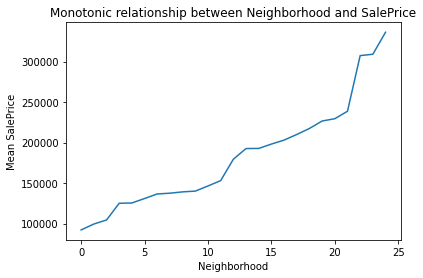

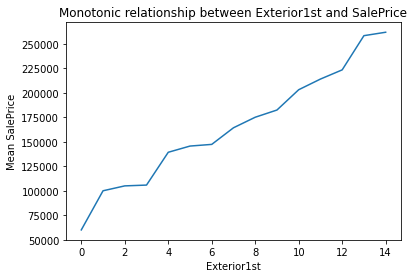

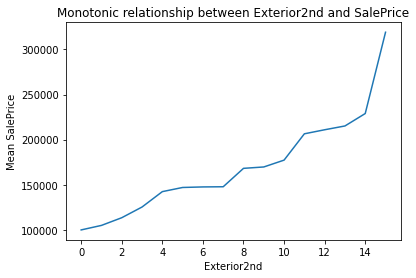

In [66]:
# let's compare the newly created monotonic relationship
# between the variables and the target

for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    fig = plt.figure()
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Monotonic relationship between {} and SalePrice'.format(var))
    fig.set_ylabel('Mean SalePrice')
    plt.show()

We see from the plots above that the relationship between the categories and the target is now monotonic, and for the first 2 variables, almost linear, which helps improve linear models performance.

### Note
Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. 


### Advantages
- quick
- returns pandas dataframe
### Limitations of pandas:
- it does not preserve information from train data to propagate to test data
- We need to store the encoding maps separately if planing to use them in production.